## Import essential library

In [700]:
import numpy as np
import pandas as pd

In [701]:
import matplotlib.pyplot as plt
import seaborn as sns

## Fish

## Import DataSet

In [702]:
df_fish = pd.read_csv("./fish.csv")

In [703]:
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [704]:
df_fish.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [705]:
df_fish.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

## Missing Data

In [706]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


There is no missing data

## Outliers

In [707]:
from collections import Counter

In [708]:
def detect_outliers1(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(df_fish[column], 25)
        # 3st quartile
        Q3 = np.percentile(df_fish[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df_fish[(df_fish[column] < Q1 - outlier_step)
                              | (df_fish[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers


In [709]:
print("number of outliers detected --> ",
      len(df_fish.loc[detect_outliers1(df_fish.columns[2:])]))

number of outliers detected -->  3


## Standardizing Data

In [710]:
X_fish= df_fish.iloc[:, 2:7]

In [711]:
X_fish

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [712]:
X_fish.shape

(159, 5)

In [713]:
y_fish = df_fish.iloc[:, 1]

In [714]:
y_fish

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [715]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

In [716]:
X_fish = sc.fit_transform(X_fish)

## Splitting the dataset (X=data, y=output) into the Training set and Test set

X_fish: data[feature]
y_fish: target variable ["weight"]

In [717]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, 
                                                                        test_size= 0.3)

In [718]:
X_fish_train

array([[-6.97160090e-01, -6.66105573e-01, -7.28121518e-01,
        -6.05469384e-01, -5.25729583e-01],
       [-8.07546926e-01, -7.87799069e-01, -8.83646840e-01,
        -9.10194183e-01, -9.79167615e-01],
       [ 7.78009454e-01,  7.56772232e-01,  6.71606377e-01,
         4.47024794e-01,  1.45583032e+00],
       [ 2.46145605e-01,  2.41915132e-01,  4.29678099e-01,
         1.26393066e+00,  2.36308139e-01],
       [ 4.26778610e-01,  4.10413819e-01,  2.39591594e-01,
         2.47853670e-01,  9.52406994e-01],
       [-5.06491917e-01, -5.06967923e-01, -4.68912649e-01,
         3.21764647e-01, -4.48609413e-01],
       [ 1.49050631e+00,  1.45885010e+00,  1.32826885e+00,
         8.23320133e-01,  1.89129745e+00],
       [ 6.47552283e-01,  7.09967041e-01,  8.87613768e-01,
         1.76609466e+00,  8.53328999e-01],
       [-1.55014928e+00, -1.60220939e+00, -1.60943167e+00,
        -1.63661878e+00, -1.86390733e+00],
       [ 1.36004914e+00,  1.36523971e+00,  1.20730471e+00,
         6.93191878e-01

In [719]:
X_fish_test

array([[-0.94803926, -0.90949257, -1.02189157, -0.88276427, -0.77006246],
       [-1.45983278, -1.49923797, -1.53166901, -1.53087787, -1.87354735],
       [ 0.37660278,  0.36360863,  0.30871396, -0.79644898, -0.61998757],
       [-0.26564791, -0.22613678, -0.21834407, -0.13822469, -0.1010926 ],
       [-0.52656225, -0.50696792, -0.58123649, -0.87824723, -0.47098378],
       [ 0.72783362,  0.80357742,  0.98265702,  2.3371611 ,  1.30051887],
       [-1.62039545, -1.66773666, -1.69583463, -1.69508288, -1.94531196],
       [-0.26564791, -0.30102508, -0.28746644, -0.44103033, -0.30436613],
       [-0.36599958, -0.35719131, -0.43435147, -0.52369454, -0.14976876],
       [ 2.58433951,  2.58217468,  2.46014758,  0.4014565 ,  1.52777344],
       [ 0.47695444,  0.47594109,  0.64568549,  1.28789673,  0.77960069],
       [ 1.10916996,  1.08440857,  1.06041968,  0.79177105,  1.25410395],
       [ 0.31639177,  0.33552551,  0.51608106,  1.51356159,  0.69176938],
       [-0.78747659, -0.78779907, -0.7

In [720]:
y_fish_train

85     130.0
81      85.0
112    685.0
11     500.0
109    514.0
       ...  
71     300.0
106    250.0
14     600.0
92     150.0
102    300.0
Name: Weight, Length: 111, dtype: float64

In [721]:
y_fish_test

78       78.0
155      13.4
128     200.0
55      270.0
94      150.0
29     1000.0
147       7.0
51      180.0
98      188.0
141    1250.0
19      650.0
60     1000.0
15      600.0
65      150.0
24      700.0
30      920.0
126    1000.0
101     218.0
96      225.0
16      700.0
151      10.0
18      610.0
12      500.0
9       500.0
31      955.0
125    1100.0
95      170.0
56      270.0
145       6.7
152       9.9
135     510.0
76       70.0
75       51.5
138     567.0
2       340.0
86      120.0
45      160.0
42      120.0
68      145.0
118     820.0
26      720.0
137     500.0
146       7.5
90      110.0
66      140.0
36       69.0
82      110.0
22      620.0
Name: Weight, dtype: float64

## Normal Equation and Prediction

In [722]:
from sklearn.linear_model import LinearRegression 

In [723]:
reg_NE = LinearRegression()
reg_NE.fit(X_fish_train, y_fish_train)

LinearRegression()

In [724]:
y_fish_pred_3 = reg_NE.predict(X_fish_test)

## Gradient Descent from Scratch

In [725]:
class LinearRegression_GD:
    def __init__(self, eta=0.001, max_iter = 20, random_state=1):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = []
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    def predict(self, X):
        return self.net_input(X)
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = []
        for n_iters in range (self.max_iter):
            errors = y - self.predict(X)
            self.w[1:] += self.eta * X.T.dot(errors)
            self.w[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2
            self.costs.append(cost)

## Gradient Descent for Training and Prediction

In [726]:
reg_GD = LinearRegression_GD(eta = 0.001, max_iter = 20, random_state=1)
reg_GD.fit(X_fish_train, y_fish_train)
y_fish_pred_1 = reg_GD.predict(X_fish_test)

## Visualizing the Cost

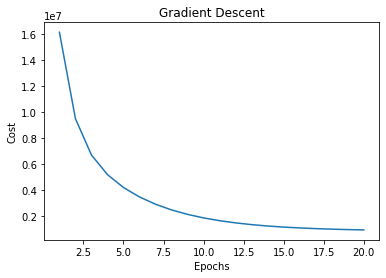

In [727]:
plt.plot(range(1,len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

## Stochastic Gradient Descent and Prediction

In [728]:
from sklearn.linear_model import SGDRegressor

In [729]:
reg_SGD = SGDRegressor(eta0=0.001, max_iter=20, random_state=1,
                       l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD.fit(X_fish_train, y_fish_train)
y_fish_pred_2 = reg_SGD.predict(X_fish_test)

## Model Evaluation

In [730]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [731]:
print('MSE of GD: ', round(MSE(y_fish_test, y_fish_pred_1), 6))
print('MSE of SGD: ', round(MSE(y_fish_test, y_fish_pred_2), 6))
print('MSE of NE: ', round(MSE(y_fish_test, y_fish_pred_3), 6))

MSE of GD:  19205.771208
MSE of SGD:  19871.711997
MSE of NE:  16217.627414


In [732]:
print('R2 of GD: ', round(R2(y_fish_test, y_fish_pred_1), 6))
print('R2 of SGD: ', round(R2(y_fish_test, y_fish_pred_2), 6))
print('R2 of NE: ', round(R2(y_fish_test, y_fish_pred_3), 6))

R2 of GD:  0.84321
R2 of SGD:  0.837774
R2 of NE:  0.867605


## Insurance

## Import Dataset

In [733]:
df_ins = pd.read_csv('.\insurance.csv')

In [734]:
df_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [735]:
df_ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing data

## Missing Data

In [736]:
df_ins.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

## Standardizing Data

## Coverting Object Labels into Categorical

In [737]:
df_ins[['sex', 'smoker', 'region']] = df_ins[['sex', 'smoker', 'region']].astype('category')
df_ins.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

## Converting category labels into numerical using LabelEncoder


In [738]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

label.fit(df_ins.sex.drop_duplicates())
df_ins.sex = label.transform(df_ins.sex)
label.fit(df_ins.smoker.drop_duplicates())
df_ins.smoker = label.transform(df_ins.smoker)
label.fit(df_ins.region.drop_duplicates())
df_ins.region = label.transform(df_ins.region)
df_ins.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [739]:
df_ins

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [740]:
X_ins = df_ins.iloc[:, :-1]

In [741]:
y_ins = df_ins.iloc[:, -1]

In [742]:
X_ins

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [743]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler 

In [744]:
sc = StandardScaler()
X_ins = sc.fit_transform(X_ins)

## Splitting the Dataset (7:3)

In [745]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_ins_train, X_ins_test, y_ins_train, y_ins_test = train_test_split(X_ins, y_ins, test_size = 0.3)

In [746]:
X_ins_train

array([[ 1.55168573, -1.0105187 ,  0.081465  , -0.90861367, -0.5074631 ,
        -0.46691549],
       [ 0.48366788,  0.98959079, -0.50253335, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.0532774 , -1.0105187 ,  0.20285792,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [ 1.33808216,  0.98959079, -0.90034121, -0.90861367, -0.5074631 ,
        -1.37232554],
       [-0.15714284, -1.0105187 ,  2.77835626,  0.75107928,  1.97058663,
         1.34390459],
       [ 1.12447859,  0.98959079, -0.12523104, -0.90861367, -0.5074631 ,
         1.34390459]])

In [747]:
X_ins_test

array([[ 0.41246669, -1.0105187 , -0.90034121,  0.75107928, -0.5074631 ,
        -1.37232554],
       [-0.22834403, -1.0105187 , -0.1055457 , -0.90861367, -0.5074631 ,
        -0.46691549],
       [ 1.7652893 , -1.0105187 , -0.61982515, -0.90861367,  1.97058663,
        -0.46691549],
       ...,
       [-1.50996545, -1.0105187 , -0.40164599, -0.90861367, -0.5074631 ,
        -1.37232554],
       [ 1.33808216,  0.98959079,  0.88856385, -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.36756307,  0.98959079, -1.42118243, -0.07876719, -0.5074631 ,
         1.34390459]])

In [748]:
y_ins_train

332     13429.03540
355     24603.04837
138     27322.73386
381     42303.69215
292     42112.23560
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 936, dtype: float64

In [749]:
y_ins_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
701      9541.69555
672      4399.73100
1163     2200.83085
1103    11363.28320
1295     1964.78000
Name: charges, Length: 402, dtype: float64

## Traing Model

## Normal Equation

In [750]:
reg_NE_ins = LinearRegression()
reg_NE_ins.fit(X_ins_train, y_ins_train)
y_ins_pred_3 = reg_NE_ins.predict(X_ins_test)

## Stochastic Gradient Descent

In [751]:
reg_SGD_ins = SGDRegressor(eta0=0.01, max_iter=20,
random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD_ins.fit(X_ins_train, y_ins_train)
y_ins_pred_2 = reg_SGD_ins.predict(X_ins_test)

## Gradient Descent

In [752]:
reg_GD_ins = LinearRegression_GD(eta=0.0003, max_iter=20,random_state=1)
reg_GD_ins.fit(X_ins_train, y_ins_train)
y_ins_pred_1 = reg_GD_ins.predict(X_ins_test)

## Visualizing the Cost

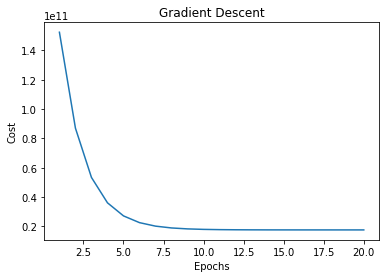

In [753]:
plt.plot(range(1, len(reg_GD_ins.costs) + 1), reg_GD_ins.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

## Performance Evaluation

In [754]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [755]:
print('MSE of GD: ', round(MSE(y_ins_test, y_ins_pred_1), 6))
print('MSE of SGD: ', round(MSE(y_ins_test, y_ins_pred_2), 6))
print('MSE of NE: ', round(MSE(y_ins_test, y_ins_pred_3), 6))

MSE of GD:  33804861.138415
MSE of SGD:  34233023.792983
MSE of NE:  33805466.898689


In [756]:
print('R2 of GD: ', round(R2(y_ins_test, y_ins_pred_1), 6))
print('R2 of SGD: ', round(R2(y_ins_test, y_ins_pred_2), 6))
print('R2 of NE: ', round(R2(y_ins_test, y_ins_pred_3), 6))

R2 of GD:  0.769446
R2 of SGD:  0.766526
R2 of NE:  0.769442


## Wine

## Import Dataset

In [757]:
df_wine = pd.read_csv('.\wine.csv')

In [758]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [759]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [760]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [761]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [762]:
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [763]:
df_wine.shape

(1599, 12)

In [764]:
acidity_count = df_wine["fixed acidity"].value_counts().reset_index()
acidity_count

,index,fixed acidity
0,7.2,67
1,7.1,57
2,7.8,53
3,7.5,52
4,7.0,50
...,...,...
91,4.6,1
92,13.5,1
93,4.9,1
94,15.9,1


## Outlier

In [765]:
from collections import Counter

In [766]:
def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(df_wine[column], 25)
        # 3st quartile
        Q3 = np.percentile(df_wine[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df_wine[(df_wine[column] < Q1 - outlier_step)
                              | (df_wine[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers


In [767]:
print("number of outliers detected --> ",
      len(df_wine.loc[detect_outliers(df_wine.columns[:-1])]))

number of outliers detected -->  120


In [768]:
df_wine.loc[detect_outliers3(df_wine.columns[:-1])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.500000,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.800000,7
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6
1475,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7


## Dropping Outlier

In [769]:
df_wine = df_wine.drop(detect_outliers3(df_wine.columns[:-1]),axis = 0).reset_index(drop = True)

## Feature Scaling

* if quality value <= 6, it will in class 0
* else it will in class 1

In [770]:
df_wine['quality'] = np.where(df_wine['quality'] > 6, 1, 0)
df_wine['quality'].value_counts()

0    1280
1     199
Name: quality, dtype: int64

In [771]:
X_wine = df_wine.iloc[:, 0:-1].values

In [772]:
X_wine

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [773]:
y_wine = df_wine.iloc[:,-1].values

In [774]:
y_wine

array([0, 0, 0, ..., 0, 0, 0])

## Splitting data into the training and testing set with ratio 7:3 (70% training, 30% testing)

In [775]:
from sklearn.model_selection import train_test_split
np.random.seed(42)   

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size = 0.3)

In [776]:
X_wine_train

array([[ 7.4  ,  0.635,  0.1  , ...,  3.58 ,  0.69 , 10.8  ],
       [ 7.5  ,  0.55 ,  0.24 , ...,  3.45 ,  0.78 ,  9.5  ],
       [ 7.6  ,  0.49 ,  0.26 , ...,  3.11 ,  0.8  ,  9.3  ],
       ...,
       [ 8.9  ,  0.12 ,  0.45 , ...,  3.41 ,  0.76 , 11.9  ],
       [ 6.2  ,  0.56 ,  0.09 , ...,  3.54 ,  0.6  , 11.3  ],
       [10.5  ,  0.36 ,  0.47 , ...,  3.23 ,  0.76 , 12.   ]])

In [777]:
X_wine_test

array([[11.6  ,  0.41 ,  0.58 , ...,  3.13 ,  0.53 , 10.   ],
       [ 7.6  ,  0.62 ,  0.32 , ...,  3.36 ,  0.52 ,  9.4  ],
       [ 9.5  ,  0.735,  0.1  , ...,  3.23 ,  0.56 , 10.1  ],
       ...,
       [ 9.3  ,  0.715,  0.24 , ...,  3.12 ,  0.59 ,  9.9  ],
       [12.   ,  0.5  ,  0.59 , ...,  2.92 ,  0.68 , 10.5  ],
       [ 6.8  ,  0.59 ,  0.1  , ...,  3.41 ,  0.67 ,  9.7  ]])

In [778]:
y_wine_train

array([1, 0, 0, ..., 1, 0, 0])

In [779]:
y_wine_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Standardizing independent variables

In [780]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [781]:
X_wine_train = sc.fit_transform(X_wine_train)
X_wine_test = sc.fit_transform(X_wine_test)

In [782]:
X_wine_train

array([[-0.54556105,  0.62346627, -0.85716762, ...,  1.80801423,
         0.35387391,  0.38335448],
       [-0.4844048 ,  0.12948289, -0.11525502, ...,  0.9037719 ,
         1.03004528, -0.90497318],
       [-0.42324855, -0.21921127, -0.00926751, ..., -1.46116959,
         1.18030558, -1.10317744],
       ...,
       [ 0.37178275, -2.3694919 ,  0.99761387, ...,  0.62554349,
         0.87978497,  1.47347788],
       [-1.2794361 ,  0.18759858, -0.91016137, ...,  1.52978582,
        -0.32229747,  0.87886512],
       [ 1.35028281, -0.97471527,  1.10360139, ..., -0.62648436,
         0.87978497,  1.57258001]])

In [783]:
X_wine_test

array([[ 2.10113535, -0.64153017,  1.68379568, ..., -1.33436628,
        -0.81717334, -0.40678533],
       [-0.39894262,  0.52881366,  0.306405  , ...,  0.29501892,
        -0.89268321, -0.98366909],
       [ 0.78859442,  1.16971623, -0.85907943, ..., -0.62593793,
        -0.5906437 , -0.31063804],
       ...,
       [ 0.66359052,  1.05825491, -0.11740752, ..., -1.40520911,
        -0.36411407, -0.50293263],
       [ 2.35114315, -0.13995424,  1.73677225, ..., -2.82206581,
         0.31547483,  0.07395113],
       [-0.89895822,  0.36162168, -0.85907943, ...,  0.6492331 ,
         0.23996495, -0.69522721]])

## Training Model

## Normal Equation and Prediction

In [784]:
from sklearn.linear_model import LinearRegression

In [785]:
reg_NE_wine = LinearRegression()
reg_NE_wine.fit(X_wine_train, y_wine_train)
y_wine_pred_3 = reg_NE_wine.predict(X_wine_test)

## Gradient Descent and Prediction

In [786]:
reg_GD_wine = LinearRegression_GD(eta = 0.0001, max_iter = 20, random_state= 42)
reg_GD_wine.fit(X_wine_train, y_wine_train)
y_wine_pred_1 = reg_GD_wine.predict(X_wine_test)

## Stochastic Gradient Descent and Prediction

In [787]:
reg_SGD_wine = SGDRegressor(eta0=0.001, max_iter=20,
random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD_wine.fit(X_wine_train, y_wine_train)
y_wine_pred_2 = reg_SGD_wine.predict(X_wine_test)

## Visualizing the Cost

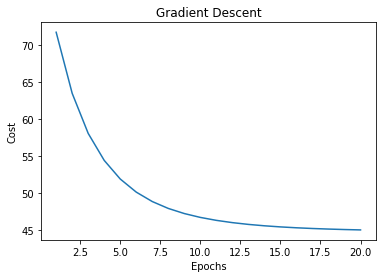

In [788]:
plt.plot(range(1, len(reg_GD_wine.costs) + 1), reg_GD_wine.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

## Performance Evaluation

In [789]:
print('MSE of GD: ', round(MSE(y_wine_test, y_wine_pred_1), 6))
print('MSE of SGD: ', round(MSE(y_wine_test, y_wine_pred_2), 6))
print('MSE of NE: ', round(MSE(y_wine_test, y_wine_pred_3), 6))

MSE of GD:  0.089477
MSE of SGD:  0.088833
MSE of NE:  0.088864


In [790]:
print('R2 of GD: ', round(R2(y_wine_test, y_wine_pred_1), 6))
print('R2 of SGD: ', round(R2(y_wine_test, y_wine_pred_2), 6))
print('R2 of NE: ', round(R2(y_wine_test, y_wine_pred_3), 6))

R2 of GD:  0.200369
R2 of SGD:  0.206122
R2 of NE:  0.205841


## Weather

## Import Dataset

In [791]:
df_weather = pd.read_csv('.\weather.csv')

In [792]:
df_weather.head()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [793]:
df_weather.dtypes

Temperature_c           float64
Humidity                float64
Wind_Speed_kmh          float64
Wind_Bearing_degrees      int64
Visibility_km           float64
Pressure_millibars      float64
Rain                      int64
Description              object
dtype: object

In [794]:
df_weather.describe()

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.857208,0.735272,10.813565,185.979700,10.372964,1004.896421,0.891200
std,9.512244,0.195498,6.972569,107.469909,4.178680,109.617120,0.311404
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.655556,0.600000,5.747700,112.000000,8.287475,1011.890000,1.000000
50%,11.561111,0.780000,9.933700,179.000000,10.046400,1016.500000,1.000000
75%,18.822222,0.900000,14.103600,290.000000,14.876400,1021.110000,1.000000
max,38.838889,1.000000,53.242700,359.000000,16.100000,1045.380000,1.000000


In [795]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


## Missing Data

In [796]:
df_weather.isna().sum()

Temperature_c           0
Humidity                0
Wind_Speed_kmh          0
Wind_Bearing_degrees    0
Visibility_km           0
Pressure_millibars      0
Rain                    0
Description             0
dtype: int64

there is no missing data

## Converting object into category

In [797]:
df_weather['Description'] = df_weather['Description'].astype('category')
df_weather.dtypes

Temperature_c            float64
Humidity                 float64
Wind_Speed_kmh           float64
Wind_Bearing_degrees       int64
Visibility_km            float64
Pressure_millibars       float64
Rain                       int64
Description             category
dtype: object

## Converting category label into numerial 

In [798]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

label.fit(df_weather.Description.drop_duplicates())
df_weather.Description = label.transform(df_weather.Description)

In [799]:
df_weather.dtypes

Temperature_c           float64
Humidity                float64
Wind_Speed_kmh          float64
Wind_Bearing_degrees      int64
Visibility_km           float64
Pressure_millibars      float64
Rain                      int64
Description               int32
dtype: object

## Outlier

In [800]:
from collections import Counter

In [801]:
def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(df_weather[column], 25)
        # 3st quartile
        Q3 = np.percentile(df_weather[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df_weather[(df_weather[column] < Q1 - outlier_step)
                              | (df_weather[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers


In [802]:
print('Outliers detected = ', len(df_weather.loc[detect_outliers(df_weather.columns[1:])]))

Outliers detected =  213


In [803]:
df_weather.loc[detect_outliers(df_weather.columns[1:])]

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
1083,-15.555556,0.00,6.4400,160,9.9820,1015.90,0,0
2259,-13.888889,0.00,22.5400,160,9.9820,1016.80,0,0
4526,-17.777778,0.00,3.2200,190,0.8050,1035.00,0,0
9014,-12.222222,0.00,17.7100,30,9.9820,1030.00,0,0
56,12.788889,0.78,34.6955,150,9.8693,993.93,1,1
...,...,...,...,...,...,...,...,...
9786,-0.144444,0.71,10.9319,219,7.7441,1040.06,0,0
9840,-3.605556,0.92,5.3613,35,3.6386,1037.76,0,0
9932,-4.655556,0.75,6.6493,339,15.8263,1041.55,0,0
9950,-9.872222,0.72,8.0500,320,7.0840,0.00,0,0


## Dropping Outlier

In [804]:
df_weather = df_weather.drop(detect_outliers(df_weather.columns[1:]),axis = 0).reset_index(drop = True)

## Data Transformation

In [805]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [806]:
df_weather['Description'] = encoder.fit_transform(df_weather['Description'])

## Splitting data into the training and testing set with ratio 7:3 (70% training, 30% testing)

In [807]:
X_weather = df_weather.iloc[:, 1:].values

In [808]:
y_weather = df_weather.iloc[:, 0].values

In [809]:
X_weather

array([[9.20000e-01, 1.12700e+01, 1.30000e+02, ..., 1.02160e+03,
        0.00000e+00, 0.00000e+00],
       [7.30000e-01, 2.09300e+01, 3.30000e+02, ..., 1.01700e+03,
        1.00000e+00, 2.00000e+00],
       [9.70000e-01, 5.97310e+00, 1.93000e+02, ..., 1.01399e+03,
        1.00000e+00, 1.00000e+00],
       ...,
       [9.30000e-01, 1.10446e+01, 2.69000e+02, ..., 1.01421e+03,
        1.00000e+00, 1.00000e+00],
       [7.80000e-01, 8.17880e+00, 2.31000e+02, ..., 1.00502e+03,
        1.00000e+00, 1.00000e+00],
       [7.90000e-01, 1.42485e+01, 1.31000e+02, ..., 1.01014e+03,
        1.00000e+00, 1.00000e+00]])

In [810]:
y_weather

array([-0.55555556, 21.11111111, 16.6       , ...,  5.97777778,
        9.78888889, 11.13888889])

In [811]:
from sklearn.model_selection import train_test_split

In [812]:
np.random.seed(42)
X_weather_train, X_weather_test, y_weather_train, y_weather_test = train_test_split(X_weather, y_weather, test_size=0.3) 

## Feature Scaling

In [813]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [814]:
X_weather_train = sc.fit_transform(X_weather_train)
X_weather_test = sc.fit_transform(X_weather_test)

## Training Model

## Gradient Descent

In [815]:
reg_GD_weather = LinearRegression_GD(eta=0.0001, max_iter=20,random_state=1)
reg_GD_weather.fit(X_weather_train, y_weather_train)
y_weather_pred_1 = reg_GD_weather.predict(X_weather_test)

## Stochastic Gradient Descent

In [816]:
reg_SGD_weather = SGDRegressor(eta0=0.001, max_iter=20,
random_state=1, l1_ratio=0, tol=None, learning_rate='constant')
reg_SGD_weather.fit(X_weather_train, y_weather_train)
y_weather_pred_2 = reg_SGD_weather.predict(X_weather_test)

## Normal Equation

In [817]:
reg_NE_weather = LinearRegression()
reg_NE_weather.fit(X_weather_train, y_weather_train)
y_weather_pred_3 = reg_NE_weather.predict(X_weather_test)

## Visualizing the Cost

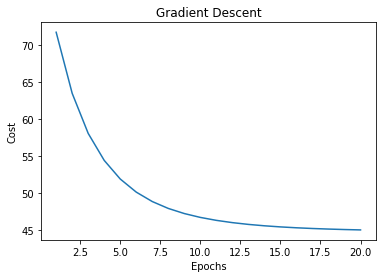

In [818]:
plt.plot(range(1, len(reg_GD_wine.costs) + 1), reg_GD_wine.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

## Evaluation Performance

## MSE

In [819]:
print('MSE of GD: ', round(MSE(y_weather_test, y_weather_pred_1), 6))
print('MSE of SGD: ', round(MSE(y_weather_test, y_weather_pred_2), 6))
print('MSE of NE: ', round(MSE(y_weather_test, y_weather_pred_3), 6))

MSE of GD:  12.468529
MSE of SGD:  12.488438
MSE of NE:  12.468277


## R2

In [820]:
print('R2 of GD: ', round(R2(y_weather_test, y_weather_pred_1), 6))
print('R2 of SGD: ', round(R2(y_weather_test, y_weather_pred_2), 6))
print('R2 of NE: ', round(R2(y_weather_test, y_weather_pred_3), 6))

R2 of GD:  0.85494
R2 of SGD:  0.854708
R2 of NE:  0.854943
